In [ ]:
# 1. Install PyTorch (with CPU or CUDA)
!pip install torch

# 2. Install Hugging Face Transformers
!pip install transformers

# 3. (Optional) Install HF hub + fix Xet warning
!pip install "huggingface_hub[hf_xet]"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [ ]:
pip install transformers datasets scikit-learn torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.


In [ ]:
pip install nltk pandas


In [ ]:
#  Imports
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

from transformers import (
    DistilBertTokenizerFast,
    DistilBertForSequenceClassification,
    TrainingArguments,
    Trainer,
    EarlyStoppingCallback
)

In [ ]:

import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from transformers import BertTokenizer, BertForSequenceClassification
import torch

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Combined_Amazon_Reviews_Updated.csv to Combined_Amazon_Reviews_Updated.csv


In [ ]:
# Load your CSV file
df = pd.read_csv('Combined_Amazon_Reviews_Updated.csv')
df = df.reset_index(drop=True)

In [ ]:
from transformers import BertTokenizer

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the cleaned review text
encoded_data = tokenizer.batch_encode_plus(
    df['reviews.text'].tolist(),
    add_special_tokens=True,
    max_length=128,
    padding='max_length',
    truncation=True,
    return_attention_mask=True,
    return_tensors='pt'
)

# These must exist before Step 4
input_ids = encoded_data['input_ids']
attention_masks = encoded_data['attention_mask']


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import torch
import numpy as np

# Step 3.1: Convert ratings to sentiment
def map_sentiment(rating):
    if rating in [1, 2]:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['reviews.rating'].apply(map_sentiment)

# Step 3.2: Encode sentiment labels into integers
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['sentiment'])

# Step 3.3: Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(df['label']),
    y=df['label']
)

# Convert to a PyTorch tensor (for use in loss function)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float)

# Show mapping and weights
print("Label mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
print("Class weights:", class_weights_tensor)


Label mapping: {'negative': np.int64(0), 'neutral': np.int64(1), 'positive': np.int64(2)}
Class weights: tensor([1.3410, 1.1599, 0.7183])


In [ ]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler

# Step 4.1: Split into train and test sets
train_inputs, val_inputs, train_masks, val_masks, train_labels, val_labels = train_test_split(
    input_ids, attention_masks, df['label'].values,
    test_size=0.2,
    random_state=42,
    stratify=df['label'].values
)

# Step 4.2: Convert to PyTorch tensors
train_dataset = TensorDataset(train_inputs, train_masks, torch.tensor(train_labels))
val_dataset   = TensorDataset(val_inputs, val_masks, torch.tensor(val_labels))

# Step 4.3: Create DataLoaders
train_dataloader = DataLoader(
    train_dataset,
    sampler=RandomSampler(train_dataset),
    batch_size=64  # adjust based on your GPU
)

val_dataloader = DataLoader(
    val_dataset,
    sampler=SequentialSampler(val_dataset),
    batch_size=64
)


In [ ]:
from transformers import BertForSequenceClassification
from torch.optim import AdamW


# Step 5.1: Load the pre-trained BERT model for classification
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=3,  # we have 3 classes: negative, neutral, positive
    output_attentions=False,
    output_hidden_states=False
)

# Step 5.2: Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Step 5.3: Define optimizer
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

# Step 5.4: Define weighted loss function
loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights_tensor.to(device))


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


FOCAL LOSS

In [ ]:
from transformers import BertForSequenceClassification
from torch.optim import AdamW
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F

# ==== CONFIG ====
epochs = 5
batch_size = 8
dropout_prob = 0.3
weight_decay = 0.01
patience = 2

# ==== FOCAL LOSS ====
class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2.0):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, weight=self.alpha, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = (1 - pt) ** self.gamma * ce_loss
        return focal_loss.mean()

# Instantiate focal loss with class weights
loss_fn = FocalLoss(alpha=class_weights_tensor.to(device), gamma=2.0)

# ==== MODEL ====
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=3,
    hidden_dropout_prob=dropout_prob,
    attention_probs_dropout_prob=dropout_prob
).to(device)

# ==== OPTIMIZER ====
optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=weight_decay)

# ==== DATALOADERS ====
train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
val_dataloader   = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=batch_size)

# ==== EARLY STOPPING SETUP ====
best_loss = float('inf')
wait = 0

# ==== TRAINING LOOP ====
for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}/{epochs}")
    model.train()
    total_train_loss = 0

    for batch in tqdm(train_dataloader, desc="Training"):
        inputs, masks, labels = [x.to(device) for x in batch]
        model.zero_grad()
        outputs = model(input_ids=inputs, attention_mask=masks)
        loss = loss_fn(outputs.logits, labels)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_dataloader)

    # ==== VALIDATION ====
    model.eval()
    total_val_loss = 0
    for batch in val_dataloader:
        inputs, masks, labels = [x.to(device) for x in batch]
        with torch.no_grad():
            outputs = model(input_ids=inputs, attention_mask=masks)
        loss = loss_fn(outputs.logits, labels)
        total_val_loss += loss.item()

    avg_val_loss = total_val_loss / len(val_dataloader)
    print(f"Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

    # ==== EARLY STOPPING CHECK ====
    if avg_val_loss < best_loss:
        best_loss = avg_val_loss
        wait = 0
        torch.save(model.state_dict(), "best_model.pt")
        print(" Best model saved.")
    else:
        wait += 1
        print(f" No improvement. Wait: {wait}/{patience}")
        if wait >= patience:
            print(" Early stopping triggered.")
            break


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1/5


Training: 100%|██████████| 1010/1010 [00:49<00:00, 20.35it/s]


Train Loss: 0.3110 | Val Loss: 0.2261
 Best model saved.

Epoch 2/5


Training: 100%|██████████| 1010/1010 [00:48<00:00, 20.86it/s]


Train Loss: 0.2226 | Val Loss: 0.1882
 Best model saved.

Epoch 3/5


Training: 100%|██████████| 1010/1010 [00:48<00:00, 20.86it/s]


Train Loss: 0.1841 | Val Loss: 0.1960
 No improvement. Wait: 1/2

Epoch 4/5


Training: 100%|██████████| 1010/1010 [00:48<00:00, 20.90it/s]


Train Loss: 0.1558 | Val Loss: 0.2161
 No improvement. Wait: 2/2
 Early stopping triggered.


the main


✅ Accuracy: 81.49%

Detailed classification report:
              precision    recall  f1-score
negative       0.883772  0.802789  0.841336
neutral        0.640523  0.843373  0.728083
positive       0.942428  0.803629  0.867512
accuracy       0.814851  0.814851  0.814851
macro avg      0.822241  0.816597  0.812310
weighted avg   0.841016  0.814851  0.820904


<Figure size 600x600 with 0 Axes>

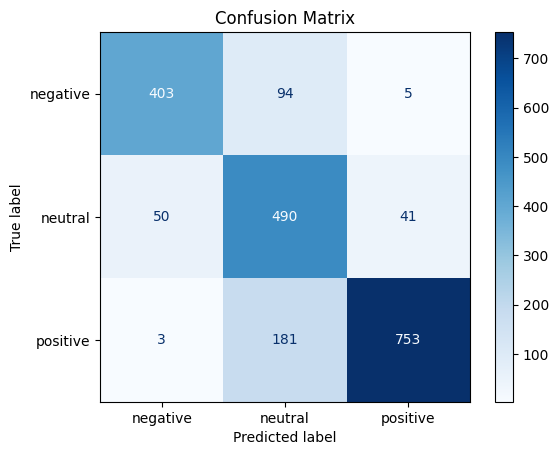

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure model is in eval mode
model.eval()

# Store predictions and true labels
all_preds = []
all_labels = []

# Evaluation loop
for batch in val_dataloader:
    b_input_ids, b_attention_mask, b_labels = [item.to(device) for item in batch]

    with torch.no_grad():
        outputs = model(input_ids=b_input_ids, attention_mask=b_attention_mask)

    logits = outputs.logits
    preds = torch.argmax(logits, dim=1).detach().cpu().numpy()
    labels = b_labels.detach().cpu().numpy()

    all_preds.extend(preds)
    all_labels.extend(labels)

# Classification report
report = classification_report(all_labels, all_preds, target_names=label_encoder.classes_, output_dict=True)
conf_matrix = confusion_matrix(all_labels, all_preds)
detailed_report = pd.DataFrame(report).transpose()

# Print summary
accuracy = report['accuracy'] * 100
print(f"\n Accuracy: {accuracy:.2f}%\n")
print("Detailed classification report:")
print(detailed_report[['precision', 'recall', 'f1-score']])

# Plot confusion matrix
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()
